In [102]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [2]:
# Importing Dataset

df = pd.read_csv("wine.csv")
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

# Dataset Contents

- Just for my Knowledge

- The dataset contains the following columns:

1. Type: Categorical column representing the class or type of wine.
2. Alcohol: Alcohol content in the wine (%).
3. Malic: Malic acid content, contributing to the acidity of the wine.
4. Ash: Amount of ash content in the wine, indicating mineral composition.
5. Alcalinity: Alkalinity of ash, related to the pH balance of the wine.
6. Magnesium: Magnesium content in the wine (mg/L).
7. Phenols: Total phenol content, indicating the wine's antioxidant properties.
8. Flavanoids: Flavonoid content, a subgroup of phenols associated with bitterness and antioxidant capacity.
9. Nonflavanoids: Non-flavonoid phenol content, impacting color and stability.
10. Proanthocyanins: Proanthocyanin content, influencing color and mouthfeel.
11. Color: Intensity of color in the wine, measured spectrophotometrically.
12. ue: Hue of the wine, representing the shade or tone of the wine's color.
13. Dilution: Dilution factor, related to the phenolic concentration.
14. Proline: Proline content, an amino acid influencing the aroma and taste of the wine.

In [4]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [9]:
df.shape

(178, 14)

# Data Visualization For Group Identification

Text(0, 0.5, 'Alcalinity Measure')

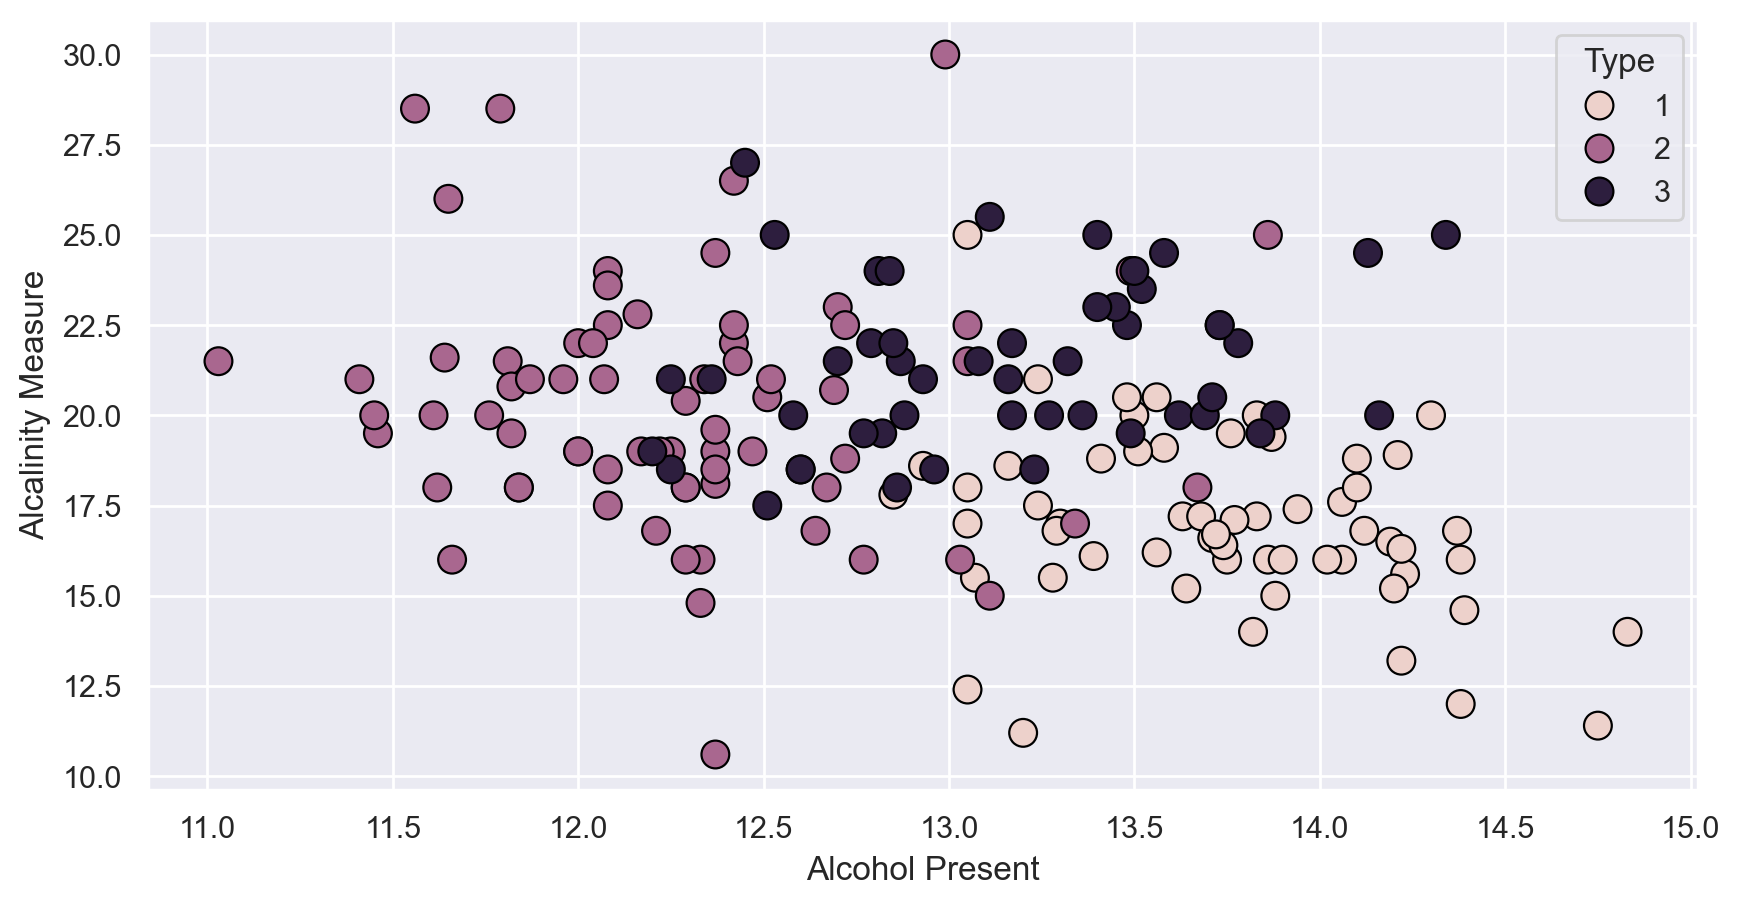

In [11]:
# Plotting grapgh for comparison between columns & identifying groups

sns.scatterplot(x = df['Alcohol'], y = df['Alcalinity'], hue=df['Type'], s = 100, edgecolor = 'black')
plt.xlabel('Alcohol Present')
plt.ylabel('Alcalinity Measure')

Text(0, 0.5, 'Amount of Proline Present')

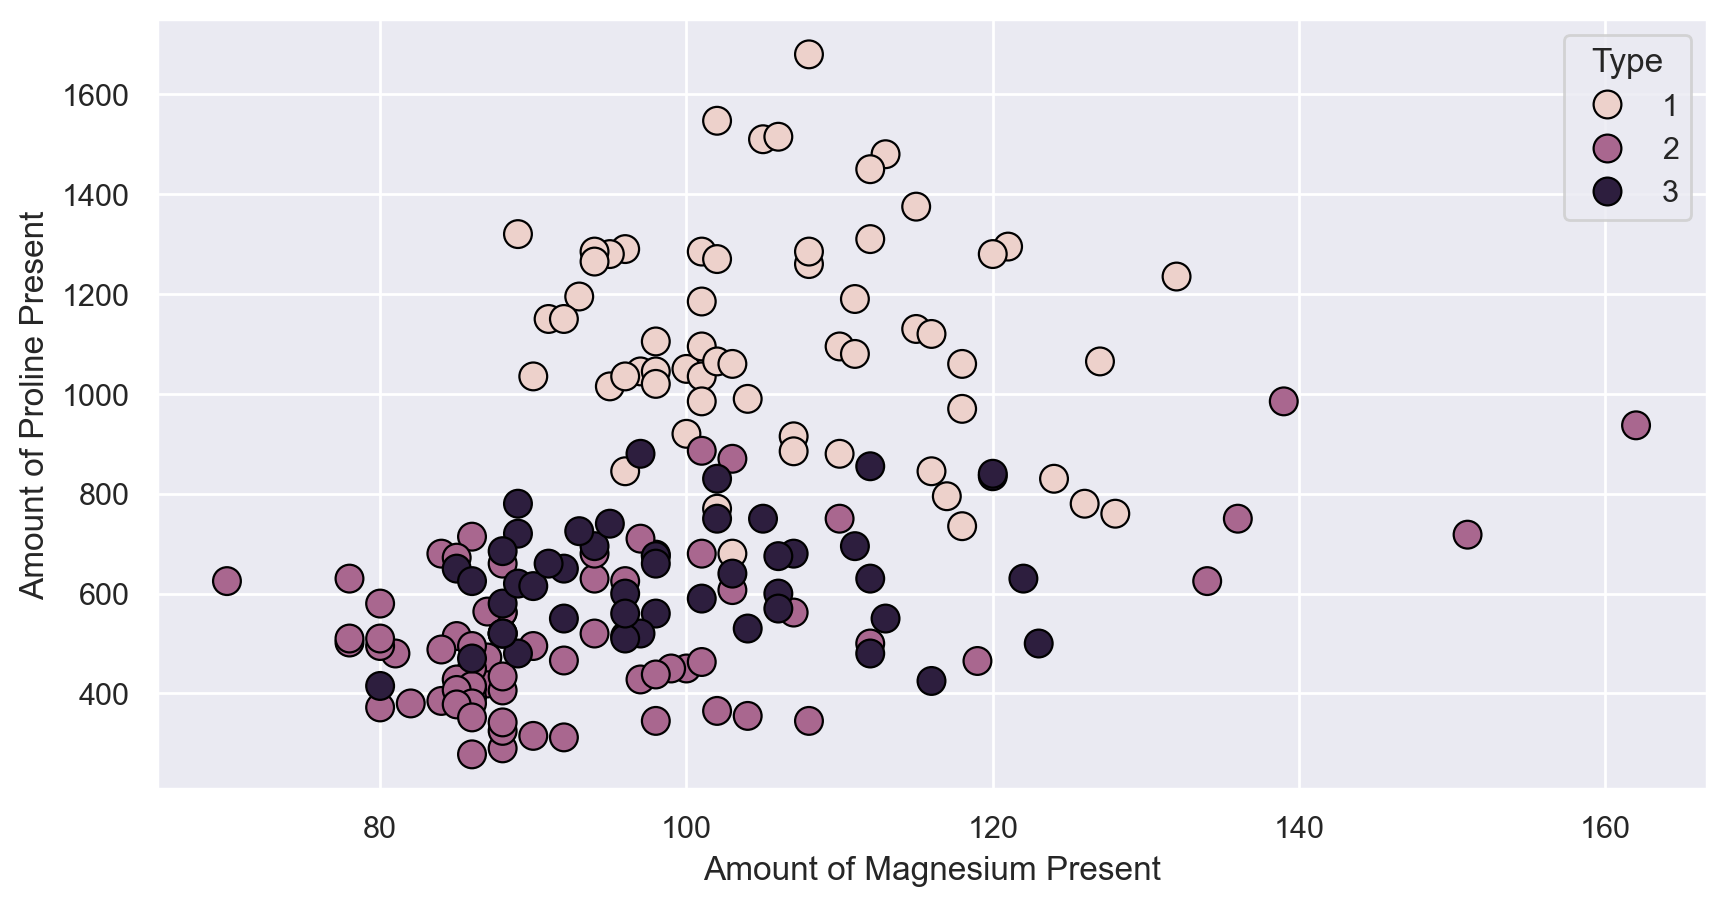

In [12]:
sns.scatterplot(x = df['Magnesium'], y = df['Proline'], hue=df['Type'], s = 100, edgecolor = 'black')
plt.xlabel('Amount of Magnesium Present')
plt.ylabel('Amount of Proline Present')

Text(0, 0.5, 'Amount of Proline Present')

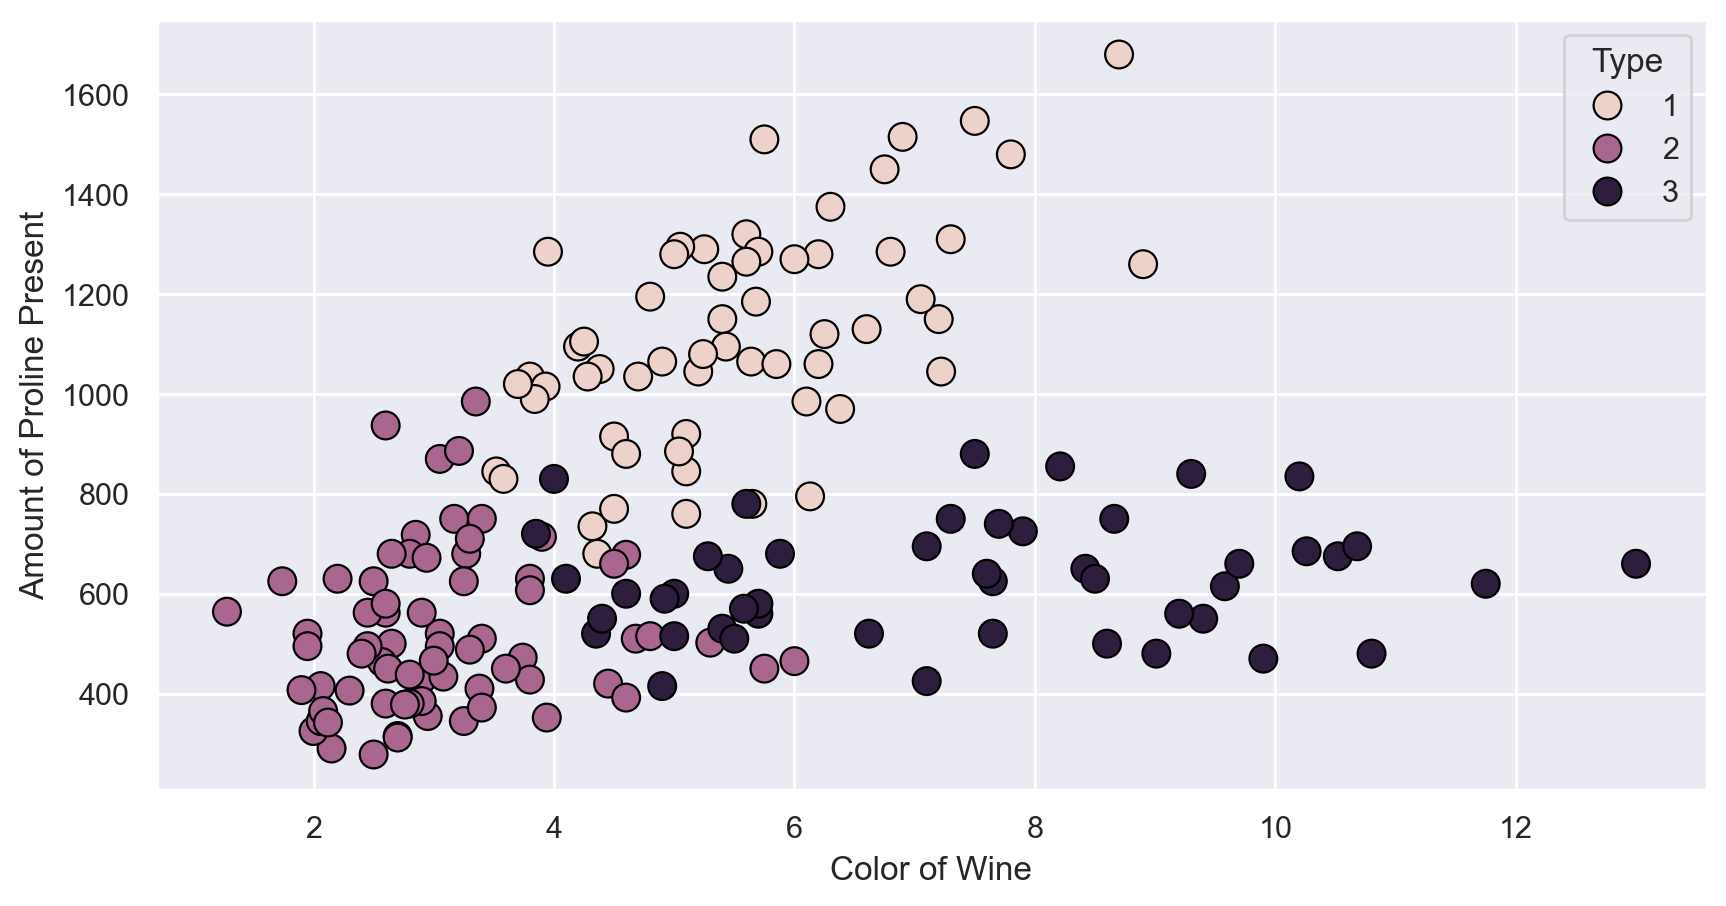

In [13]:
sns.scatterplot(x = df['Color'], y = df['Proline'], hue=df['Type'], s = 100, edgecolor = 'black')
plt.xlabel('Color of Wine')
plt.ylabel('Amount of Proline Present')

# Data Pre-Processing

In [15]:
df.rename(columns={'Flavanoids' : 'Flav', 'Nonflavanoids' : 'NonFlav', 'Proanthocyanins' : 'ProAnth', 'Magnesium' : 'Mg'}, inplace=True)

In [16]:
df

Type  Alcohol  Malic   Ash  Alcalinity   Mg  Phenols  Flav  NonFlav  \
0       1    14.23   1.71  2.43        15.6  127     2.80  3.06     0.28   
1       1    13.20   1.78  2.14        11.2  100     2.65  2.76     0.26   
2       1    13.16   2.36  2.67        18.6  101     2.80  3.24     0.30   
3       1    14.37   1.95  2.50        16.8  113     3.85  3.49     0.24   
4       1    13.24   2.59  2.87        21.0  118     2.80  2.69     0.39   
..    ...      ...    ...   ...         ...  ...      ...   ...      ...   
173     3    13.71   5.65  2.45        20.5   95     1.68  0.61     0.52   
174     3    13.40   3.91  2.48        23.0  102     1.80  0.75     0.43   
175     3    13.27   4.28  2.26        20.0  120     1.59  0.69     0.43   
176     3    13.17   2.59  2.37        20.0  120     1.65  0.68     0.53   
177     3    14.13   4.10  2.74        24.5   96     2.05  0.76     0.56   

     ProAnth  Color   Hue  Dilution  Proline  
0       2.29   5.64  1.04      3.92     1065  
1       1.28   4.38  1.05      3.40     1050  
2       2.81   5.68  1.03      3.17     1185  
3       2.18   7.80  0.86      3.45     1480  
4       1.82   4.32  1.04      2.93      735  
..       ...    ...   ...       ...      ...  
173     1.06   7.70  0.64      1.74      740  
174     1.41   7.30  0.70      1.56      750  
175     1.35  10.20  0.59      1.56      835  
176     1.46   9.30  0.60      1.62      840  
177     1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

# Data Visualization of Entire Dataset

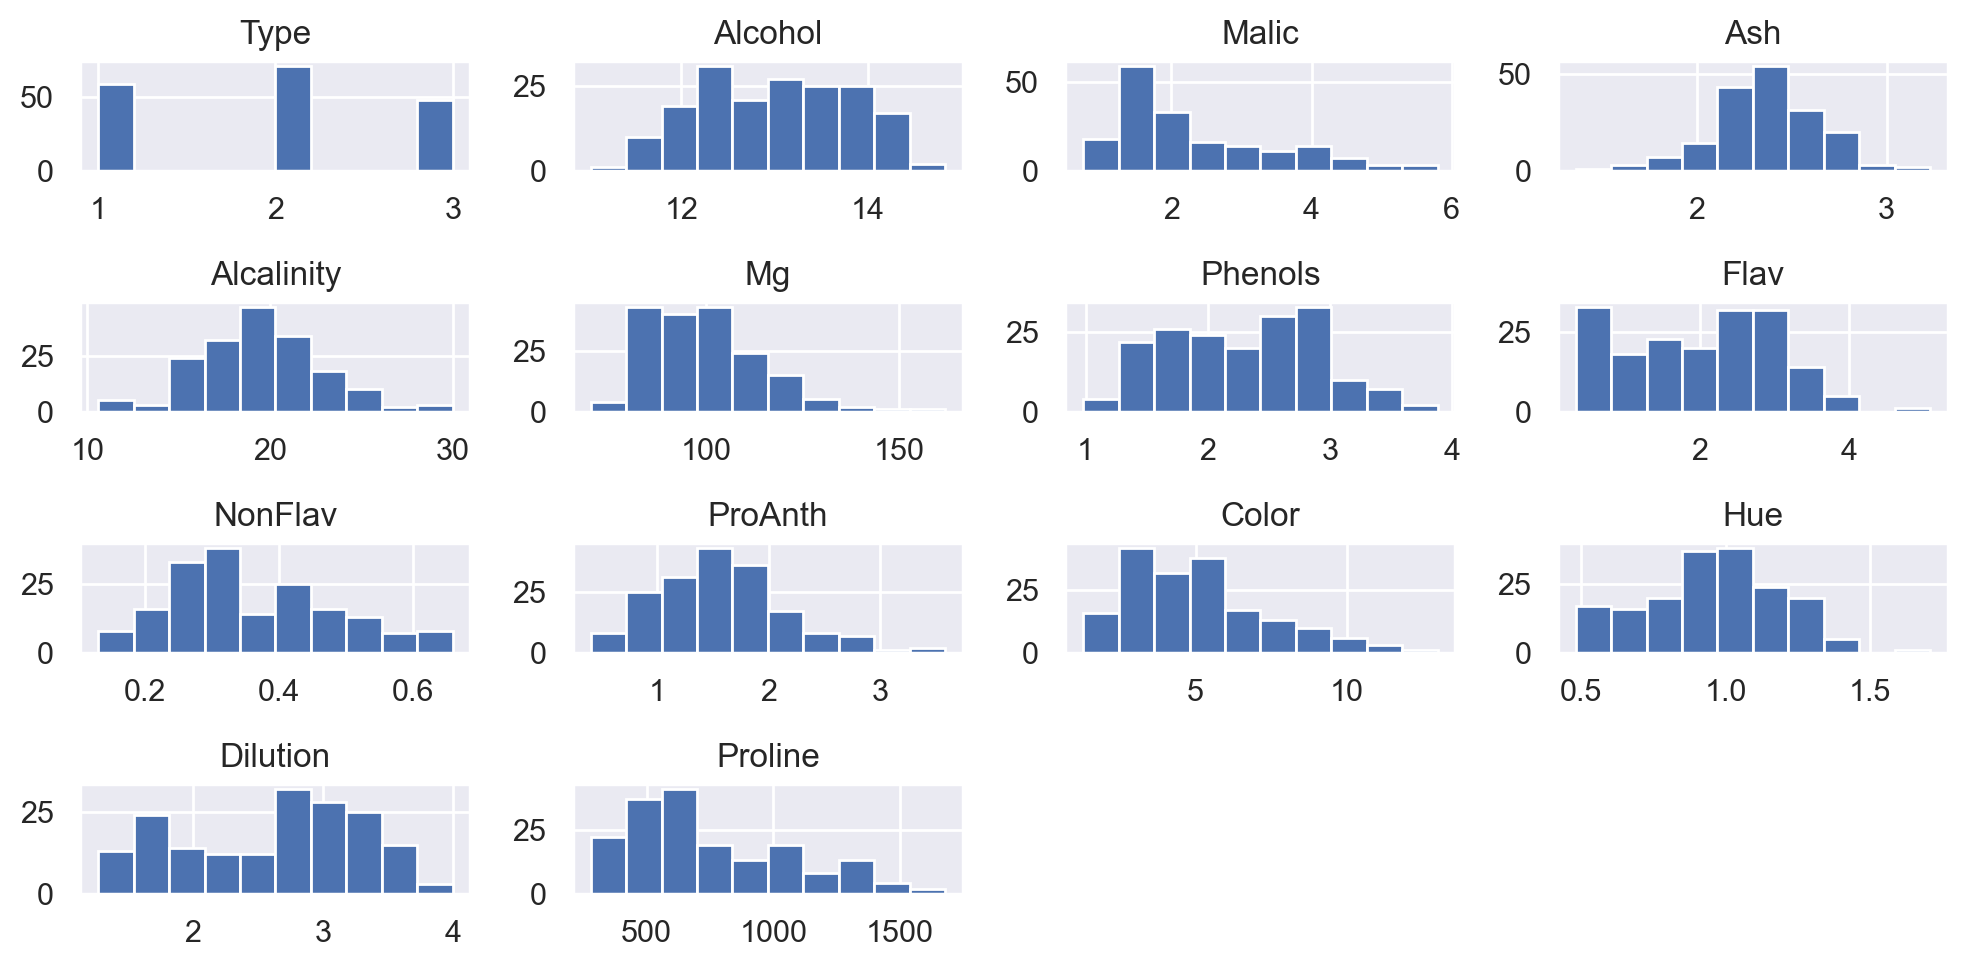

In [18]:
df.hist()
plt.tight_layout()

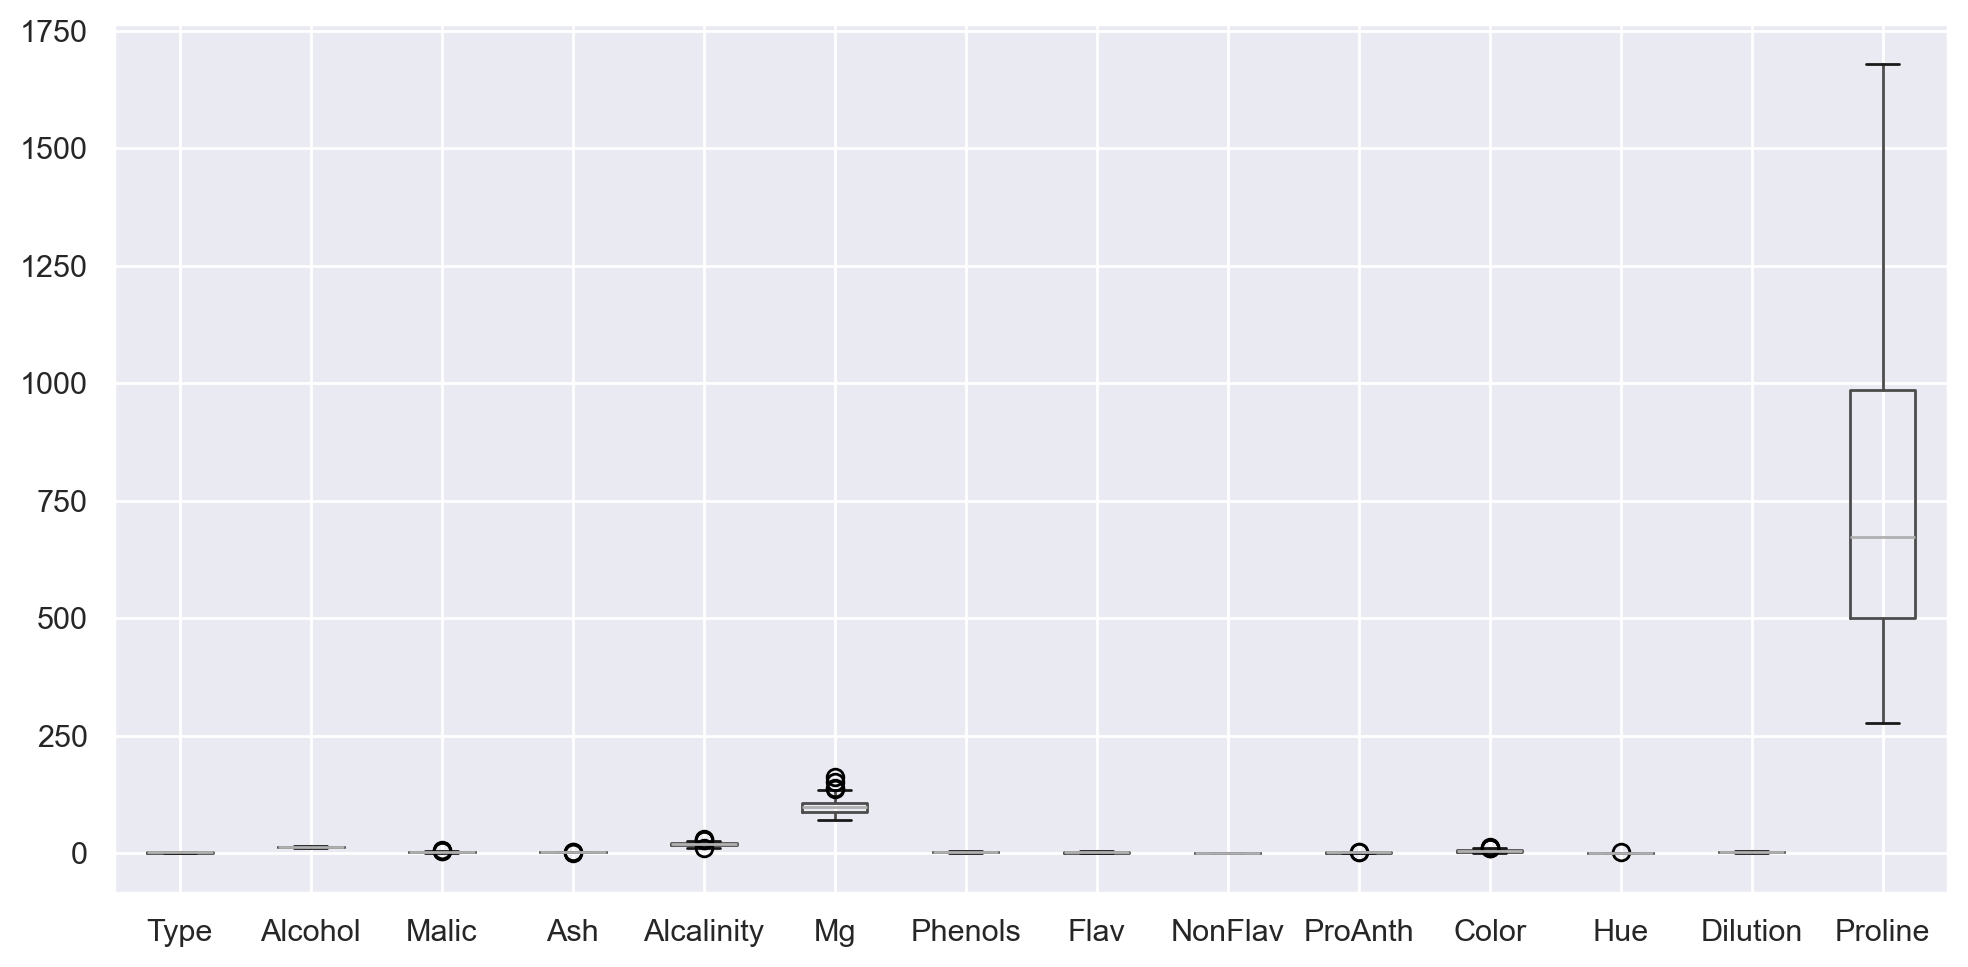

In [19]:
df.boxplot()
plt.tight_layout()

- There are outliers in multiple columms.
- But I am not dealing with the outliers as they can be important points in the Data for inferation.

# Seperating Data into X & Y.

In [37]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity   Mg  Phenols  Flav  NonFlav  \
0     1    14.23   1.71  2.43        15.6  127     2.80  3.06     0.28   
1     1    13.20   1.78  2.14        11.2  100     2.65  2.76     0.26   
2     1    13.16   2.36  2.67        18.6  101     2.80  3.24     0.30   
3     1    14.37   1.95  2.50        16.8  113     3.85  3.49     0.24   
4     1    13.24   2.59  2.87        21.0  118     2.80  2.69     0.39   

   ProAnth  Color   Hue  Dilution  Proline  
0     2.29   5.64  1.04      3.92     1065  
1     1.28   4.38  1.05      3.40     1050  
2     2.81   5.68  1.03      3.17     1185  
3     2.18   7.80  0.86      3.45     1480  
4     1.82   4.32  1.04      2.93      735

In [39]:
x = df.drop('Type', axis=1)
y = df['Type']

In [41]:
x

Alcohol  Malic   Ash  Alcalinity   Mg  Phenols  Flav  NonFlav  ProAnth  \
0      14.23   1.71  2.43        15.6  127     2.80  3.06     0.28     2.29   
1      13.20   1.78  2.14        11.2  100     2.65  2.76     0.26     1.28   
2      13.16   2.36  2.67        18.6  101     2.80  3.24     0.30     2.81   
3      14.37   1.95  2.50        16.8  113     3.85  3.49     0.24     2.18   
4      13.24   2.59  2.87        21.0  118     2.80  2.69     0.39     1.82   
..       ...    ...   ...         ...  ...      ...   ...      ...      ...   
173    13.71   5.65  2.45        20.5   95     1.68  0.61     0.52     1.06   
174    13.40   3.91  2.48        23.0  102     1.80  0.75     0.43     1.41   
175    13.27   4.28  2.26        20.0  120     1.59  0.69     0.43     1.35   
176    13.17   2.59  2.37        20.0  120     1.65  0.68     0.53     1.46   
177    14.13   4.10  2.74        24.5   96     2.05  0.76     0.56     1.35   

     Color   Hue  Dilution  Proline  
0     5.64  1.04      3.92     1065  
1     4.38  1.05      3.40     1050  
2     5.68  1.03      3.17     1185  
3     7.80  0.86      3.45     1480  
4     4.32  1.04      2.93      735  
..     ...   ...       ...      ...  
173   7.70  0.64      1.74      740  
174   7.30  0.70      1.56      750  
175  10.20  0.59      1.56      835  
176   9.30  0.60      1.62      840  
177   9.20  0.61      1.60      560  

[178 rows x 13 columns]

In [43]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

# Standardization

In [46]:
sc = StandardScaler()

sc_x = sc.fit_transform(x)
sc_x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Implementing PCA

In [48]:
# Implementing PCA

pca = PCA()
pcs = pca.fit_transform(sc_x)
pcs

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [50]:
pd.DataFrame(pcs)

0         1         2         3         4         5         6   \
0    3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1    2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2    2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3    3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4    1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524  2.216289 -0.342570  1.058527 -0.574164  1.108788  0.958416   
174 -2.601956  1.757229  0.207581  0.349496  0.255063  0.026465  0.146894   
175 -2.677839  2.760899 -0.940942  0.312035  1.271355 -0.273068  0.679235   
176 -2.387017  2.297347 -0.550696 -0.688285  0.813955 -1.178783  0.633975   
177 -3.208758  2.768920  1.013914  0.596903 -0.895193 -0.296092  0.005741   

           7         8         9         10        11        12  
0   -0.065139 -0.641443  1.020956 -0.451563  0.540810 -0.066239  
1   -1.024416  0.308847  0.159701 -0.142657  0.388238  0.003637  
2    0.344216  1.177834  0.113361 -0.286673  0.000584  0.021717  
3   -0.643593 -0.052544  0.239413  0.759584 -0.242020 -0.369484  
4   -0.416700 -0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173  0.146097  0.022498 -0.304117  0.139228  0.170786 -0.114427  
174  0.552427  0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175 -0.047024 -0.001222 -0.247997  0.512492  0.698766  0.072078  
176 -0.390829 -0.057448  0.491490  0.299822  0.339821 -0.021866  
177  0.292914 -0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

In [52]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

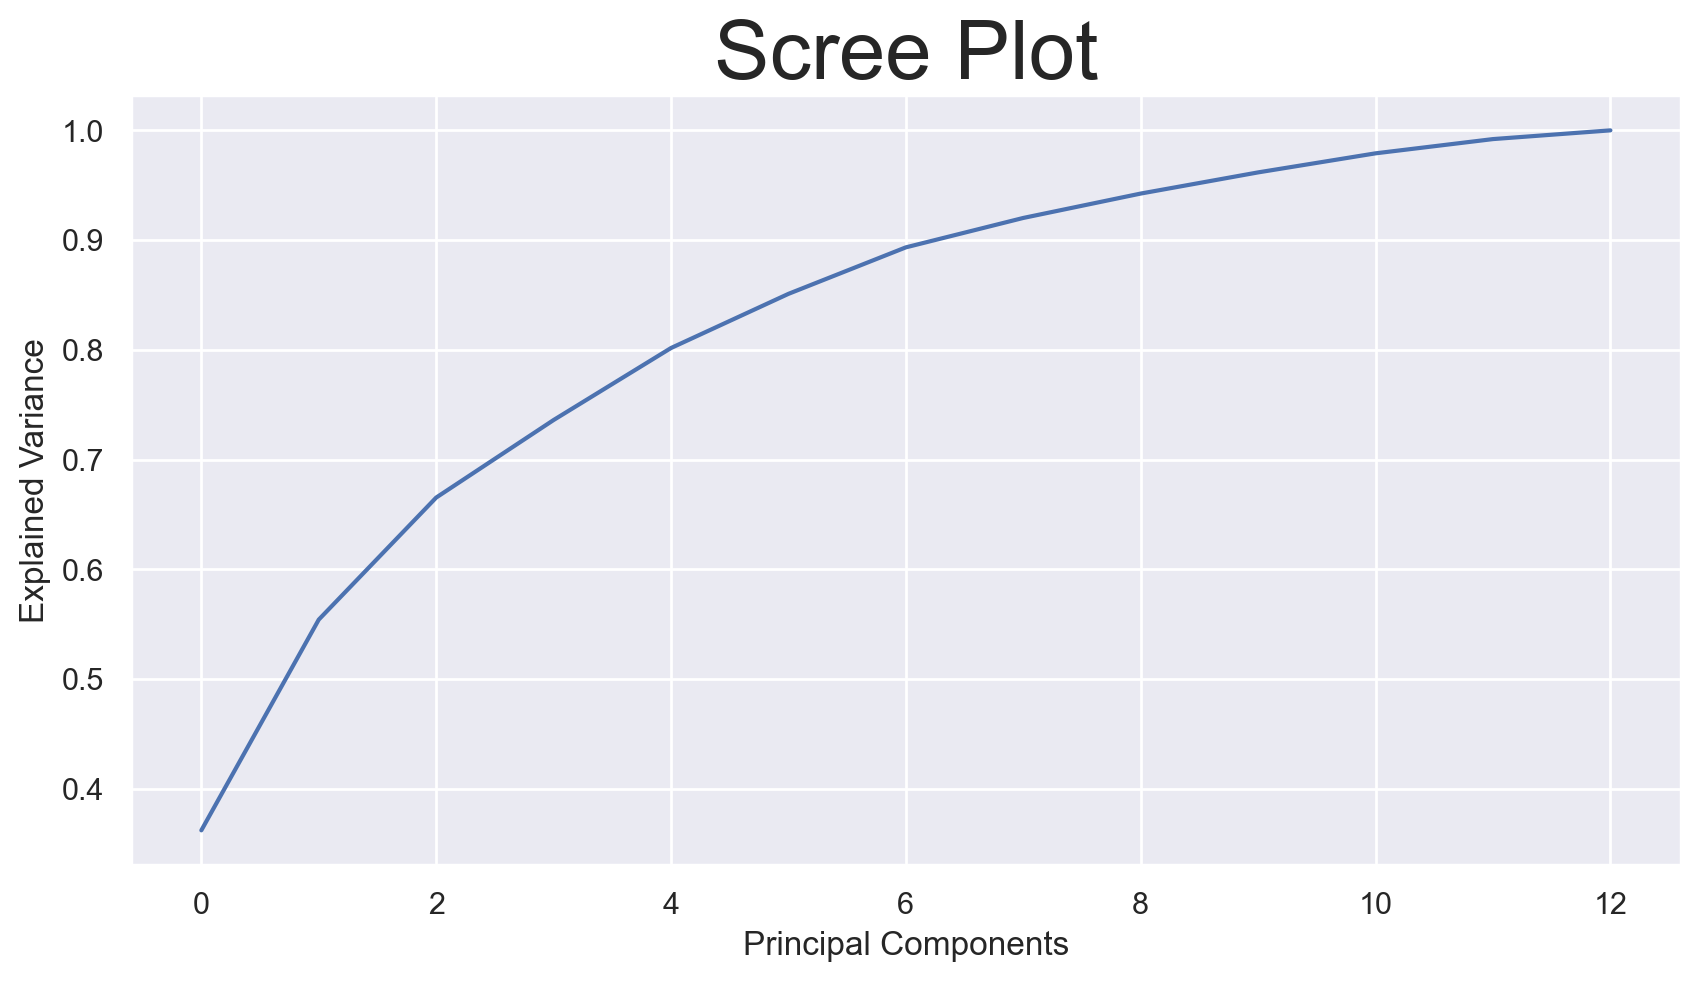

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size=30)

- The Principal Component Value = 6 gives 90 % information for predicting the Type of Wine.

In [58]:
pca = PCA(n_components=6)

pcs = pca.fit_transform(sc_x)
pcs

array([[ 3.31675081,  1.44346263, -0.16573904, -0.21563119,  0.69304284,
         0.22388013],
       [ 2.20946492, -0.33339289, -2.02645737, -0.29135832, -0.25765463,
         0.92712024],
       [ 2.51674015,  1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
        -0.54927605],
       ...,
       [-2.67783946,  2.76089913, -0.94094188,  0.31203475,  1.271355  ,
        -0.27306792],
       [-2.38701709,  2.29734668, -0.5506962 , -0.68828455,  0.81395522,
        -1.17878298],
       [-3.20875816,  2.76891957,  1.01391366,  0.59690319, -0.89519259,
        -0.29609218]])

In [60]:
# Creating a Dataframe for PCA data with 6 Components.

data = pd.DataFrame(pcs,columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
data

PC1       PC2       PC3       PC4       PC5       PC6
0    3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880
1    2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120
2    2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276
3    3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431
4    1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520
..        ...       ...       ...       ...       ...       ...
173 -3.370524  2.216289 -0.342570  1.058527 -0.574164  1.108788
174 -2.601956  1.757229  0.207581  0.349496  0.255063  0.026465
175 -2.677839  2.760899 -0.940942  0.312035  1.271355 -0.273068
176 -2.387017  2.297347 -0.550696 -0.688285  0.813955 -1.178783
177 -3.208758  2.768920  1.013914  0.596903 -0.895193 -0.296092

[178 rows x 6 columns]

In [63]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [65]:
data['Type'] = y

In [67]:
data

PC1       PC2       PC3       PC4       PC5       PC6  Type
0    3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880     1
1    2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120     1
2    2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276     1
3    3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431     1
4    1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520     1
..        ...       ...       ...       ...       ...       ...   ...
173 -3.370524  2.216289 -0.342570  1.058527 -0.574164  1.108788     3
174 -2.601956  1.757229  0.207581  0.349496  0.255063  0.026465     3
175 -2.677839  2.760899 -0.940942  0.312035  1.271355 -0.273068     3
176 -2.387017  2.297347 -0.550696 -0.688285  0.813955 -1.178783     3
177 -3.208758  2.768920  1.013914  0.596903 -0.895193 -0.296092     3

[178 rows x 7 columns]

# 3D Visualization of the PCA Class/Data

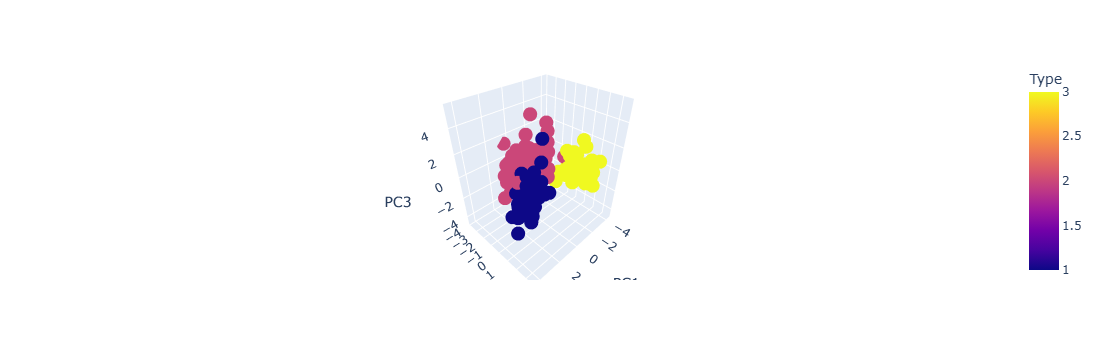

In [70]:
import plotly.express as pe

pe.scatter_3d(data_frame=data, x='PC1',y='PC2',z='PC3',color='Type')

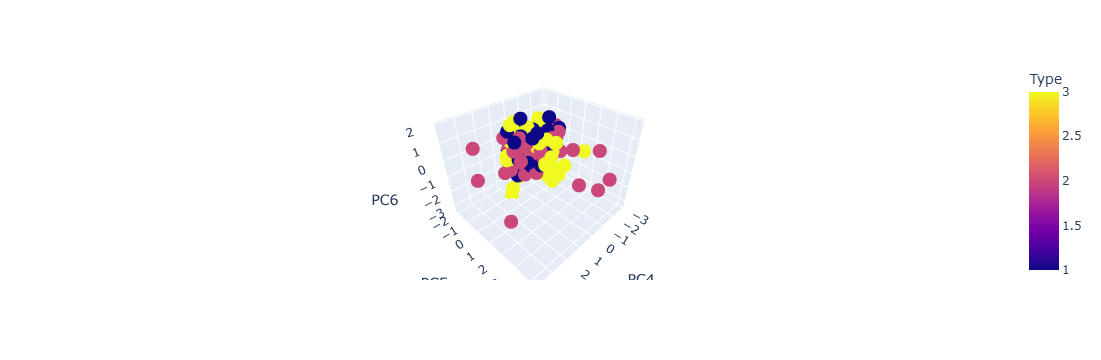

In [72]:
pe.scatter_3d(data_frame=data, x='PC4',y='PC5',z='PC6',color='Type')

<Axes: xlabel='PC1', ylabel='PC2'>

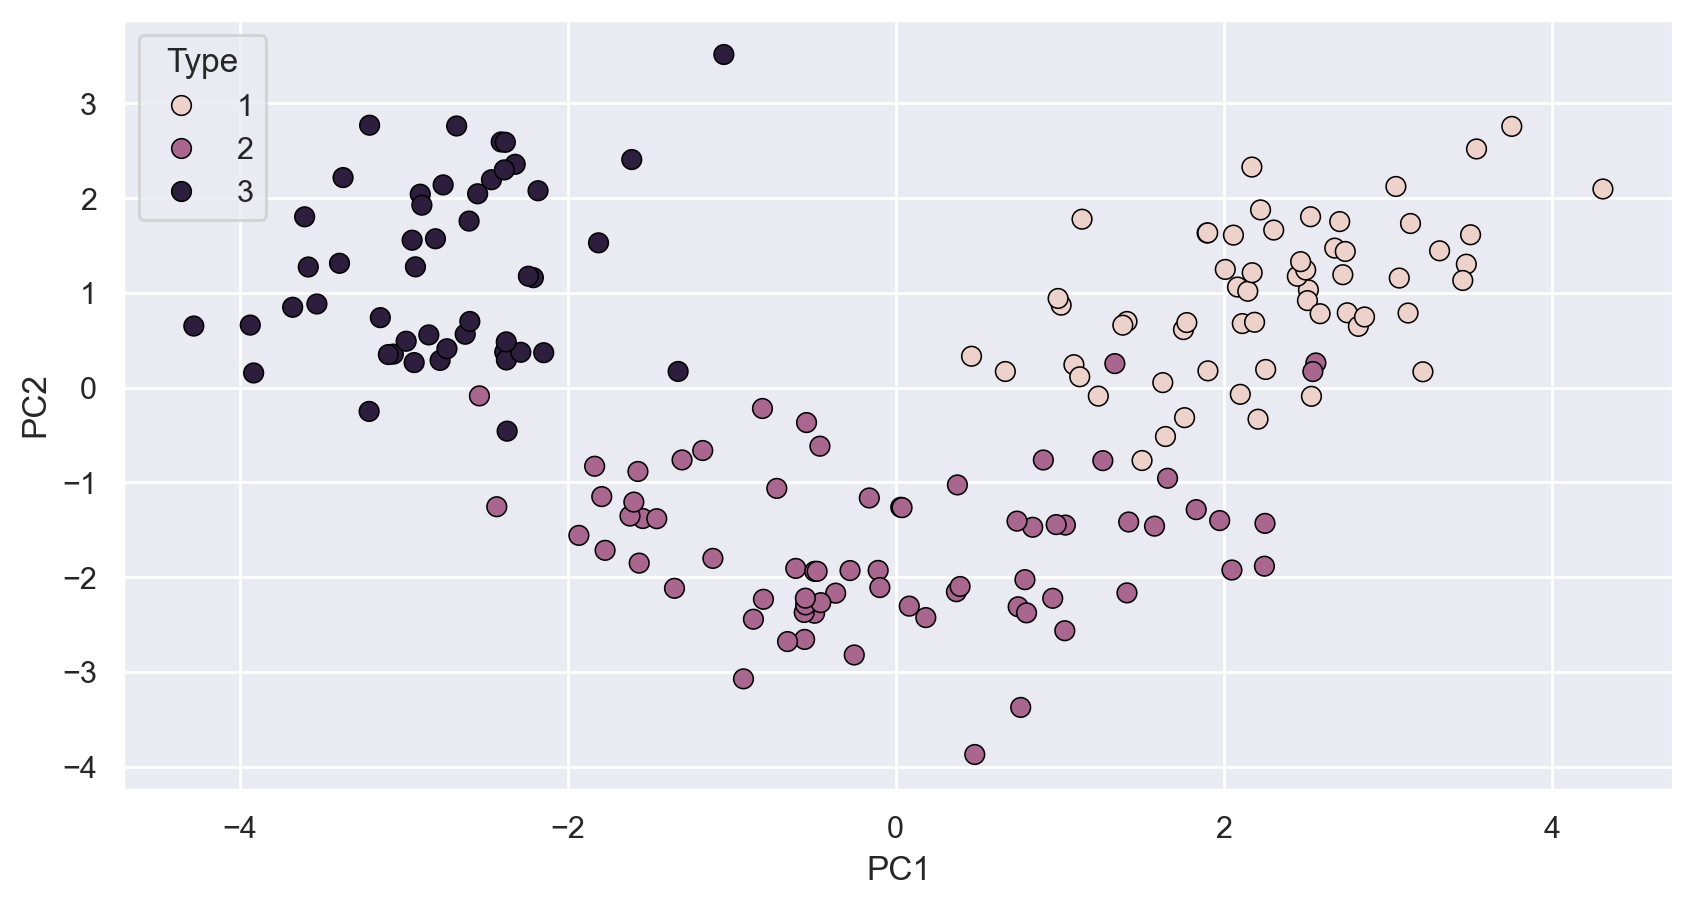

In [74]:
sns.scatterplot(x = data['PC1'], y = data['PC2'],s = 50, edgecolor = 'black',hue=data['Type'])

<Axes: xlabel='PC3', ylabel='PC4'>

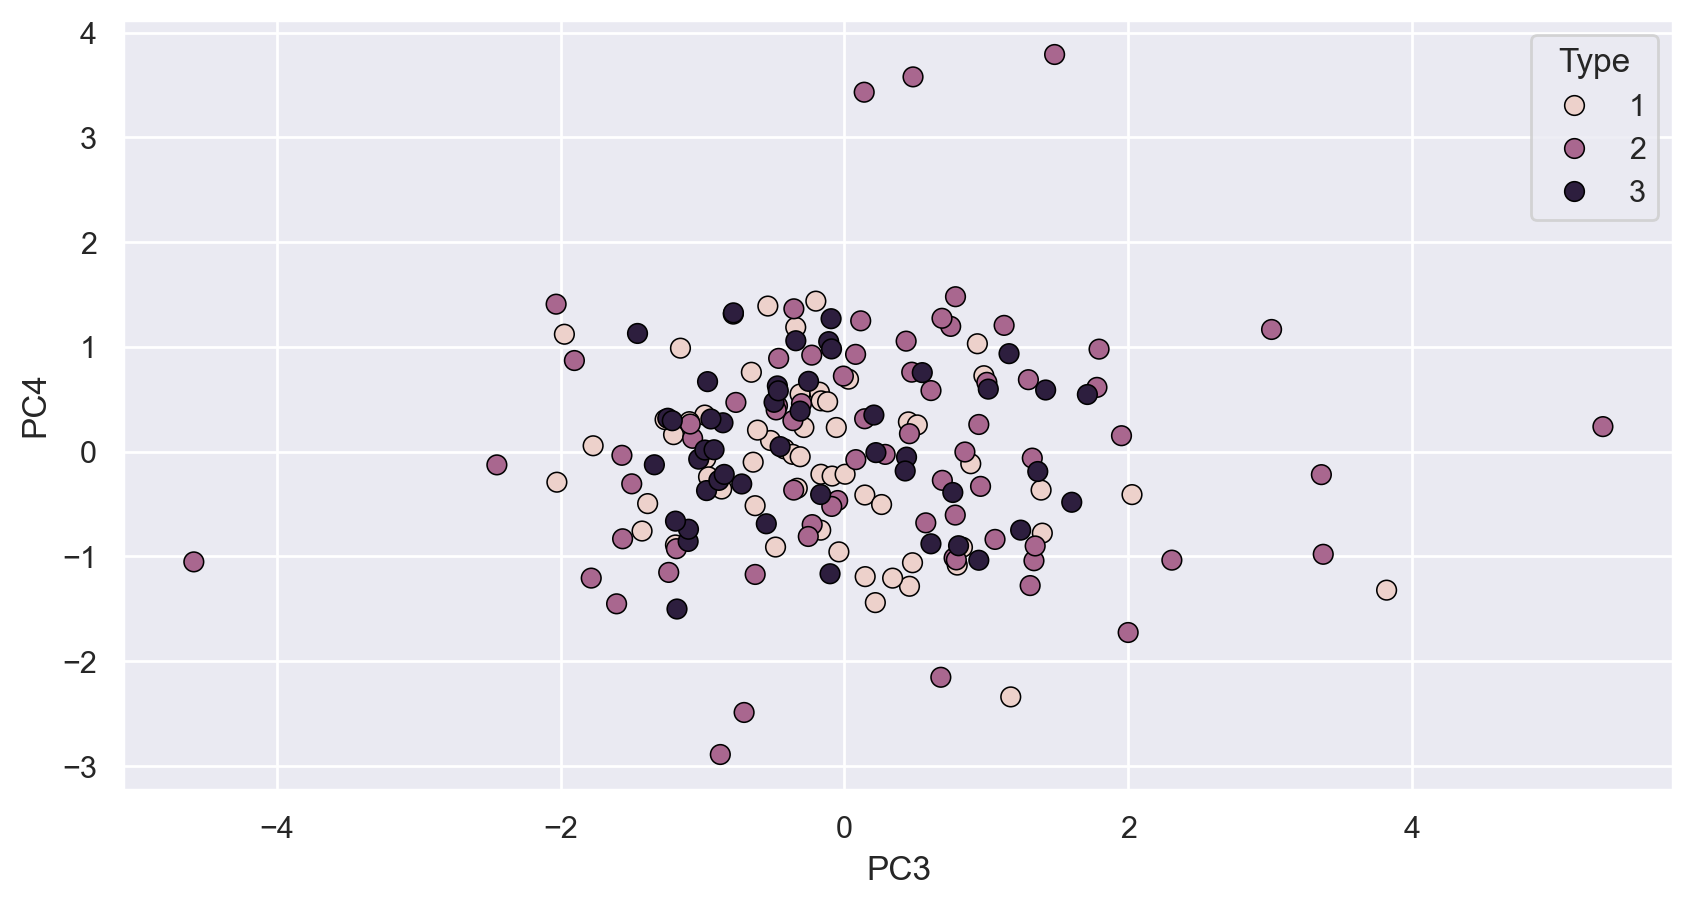

In [78]:
sns.scatterplot(x = data['PC3'], y = data['PC4'],s = 50, edgecolor = 'black',hue=data['Type'])

<Axes: xlabel='PC5', ylabel='PC6'>

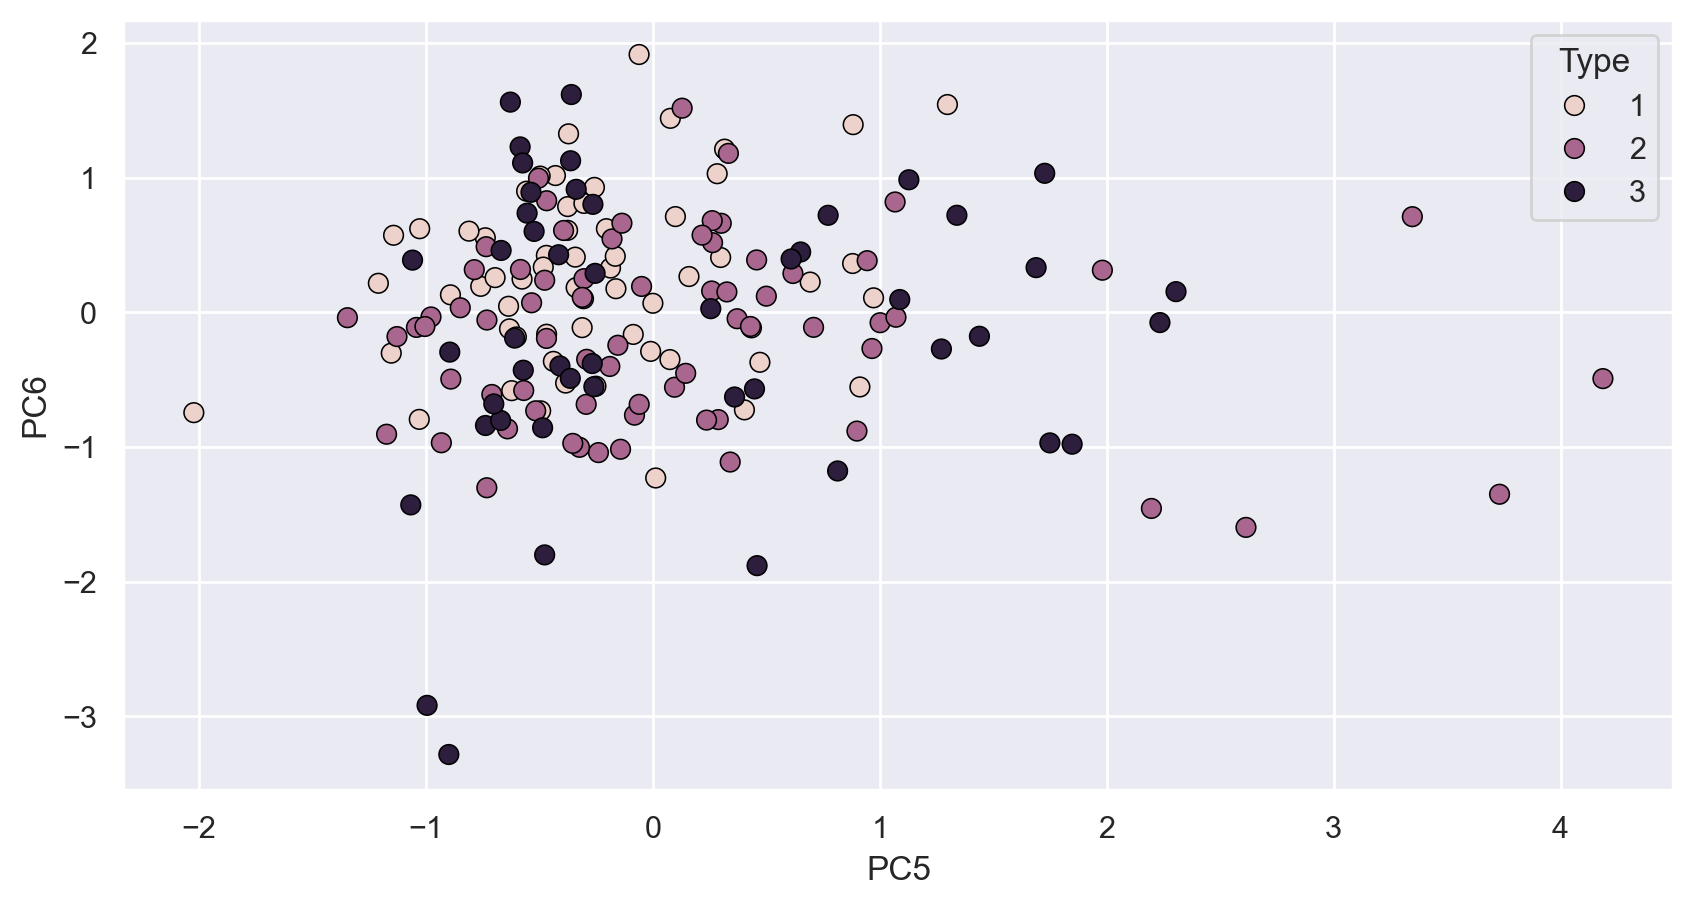

In [80]:
sns.scatterplot(x = data['PC5'], y = data['PC6'],s = 50, edgecolor = 'black',hue=data['Type'])

# Applying Logistic Regression & K-Means Clustering Algorithms.

In [84]:
# Splitting data into x and y

x = data.drop('Type', axis=1)
y = data['Type']

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

1. Logistic Regression

In [89]:
lg = LogisticRegression()

lg.fit(xtrain, ytrain)
ypred = lg.predict(xtest)

In [91]:
# Evaluating The Created Model By Using Classification Report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



- As we can see that, even after selecting 50% of the entire dataset, still we are able to get 97% accuracy of the model.

2. K-Means Clustering Model

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [104]:
# Clustering On Original Scaled Data

kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(sc_x)

In [106]:
# Calculate evaluation metrics

silhouette_original = silhouette_score(sc_x, clusters_original)
davies_bouldin_original = davies_bouldin_score(sc_x, clusters_original)

In [108]:
silhouette_original

0.2848589191898987

In [110]:
davies_bouldin_original

1.3891879777181648

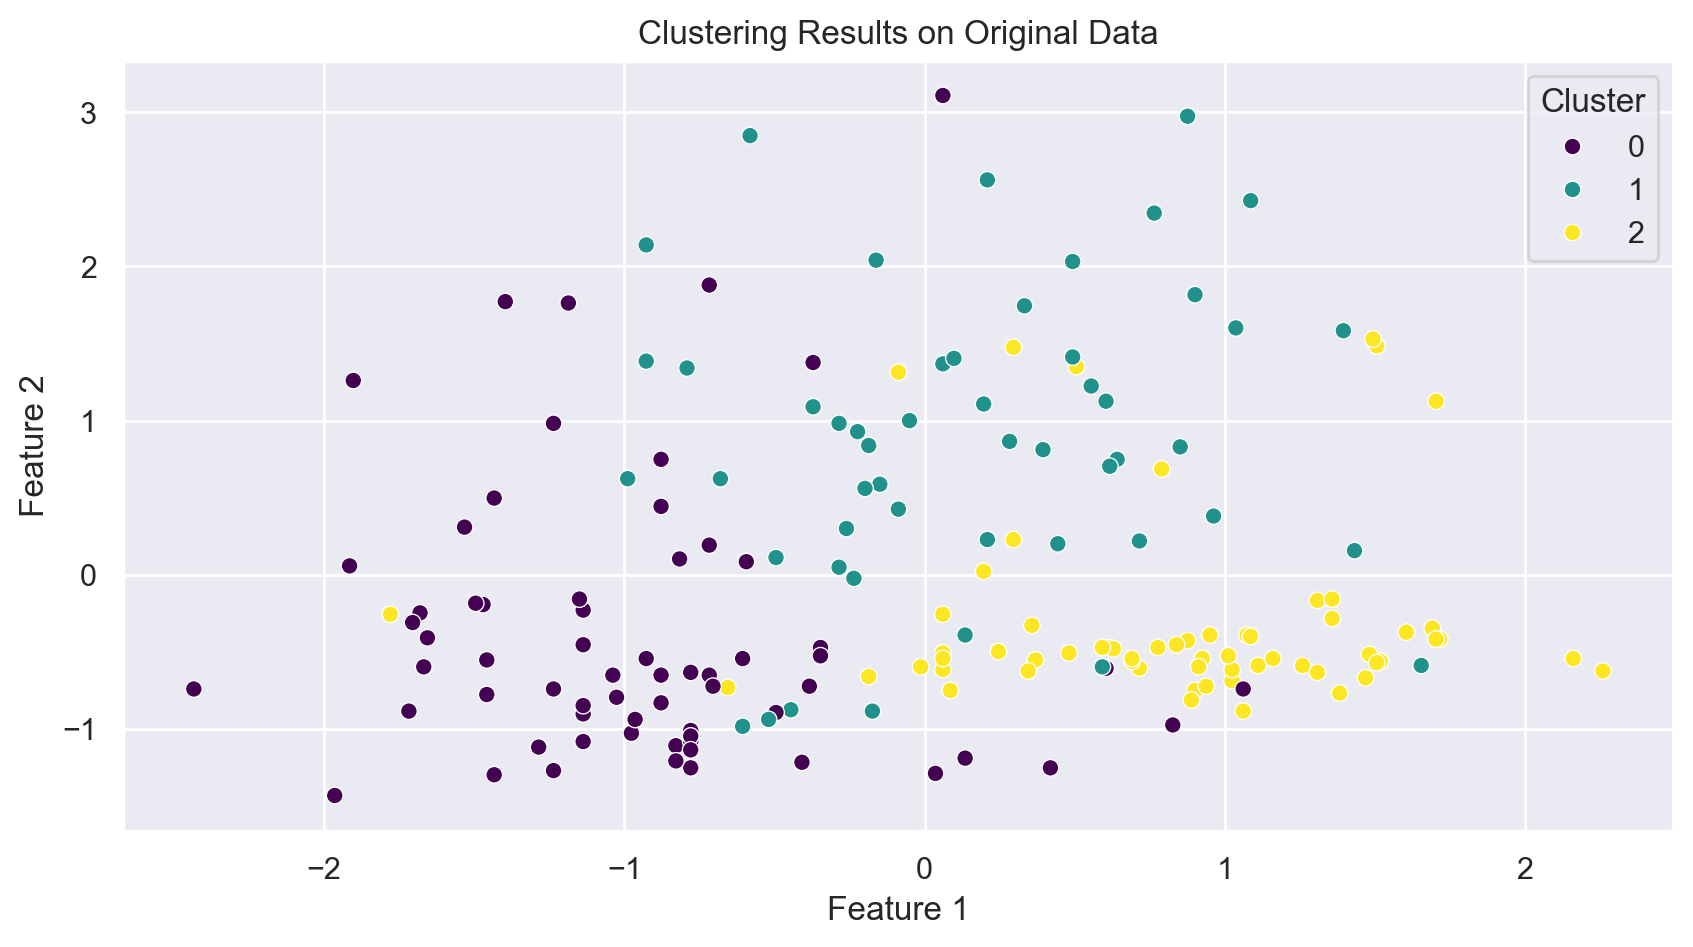

In [112]:
# Visualize clustering results using a pairplot of the first two features

sns.scatterplot(x=sc_x[:, 0], y=sc_x[:, 1], hue=clusters_original, palette='viridis')
plt.title('Clustering Results on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')

In [116]:
data.drop(['Type'], axis=1)

PC1       PC2       PC3       PC4       PC5       PC6
0    3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880
1    2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120
2    2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276
3    3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431
4    1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520
..        ...       ...       ...       ...       ...       ...
173 -3.370524  2.216289 -0.342570  1.058527 -0.574164  1.108788
174 -2.601956  1.757229  0.207581  0.349496  0.255063  0.026465
175 -2.677839  2.760899 -0.940942  0.312035  1.271355 -0.273068
176 -2.387017  2.297347 -0.550696 -0.688285  0.813955 -1.178783
177 -3.208758  2.768920  1.013914  0.596903 -0.895193 -0.296092

[178 rows x 6 columns]

In [118]:
# Clustering on PCA-Transformed Data (PCA already performed)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(data)

In [120]:
# Calculate evaluation metrics

silhouette_pca = silhouette_score(data, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(data, clusters_pca)

In [122]:
silhouette_pca

0.3605434593993418

In [124]:
davies_bouldin_pca

1.122019191571322

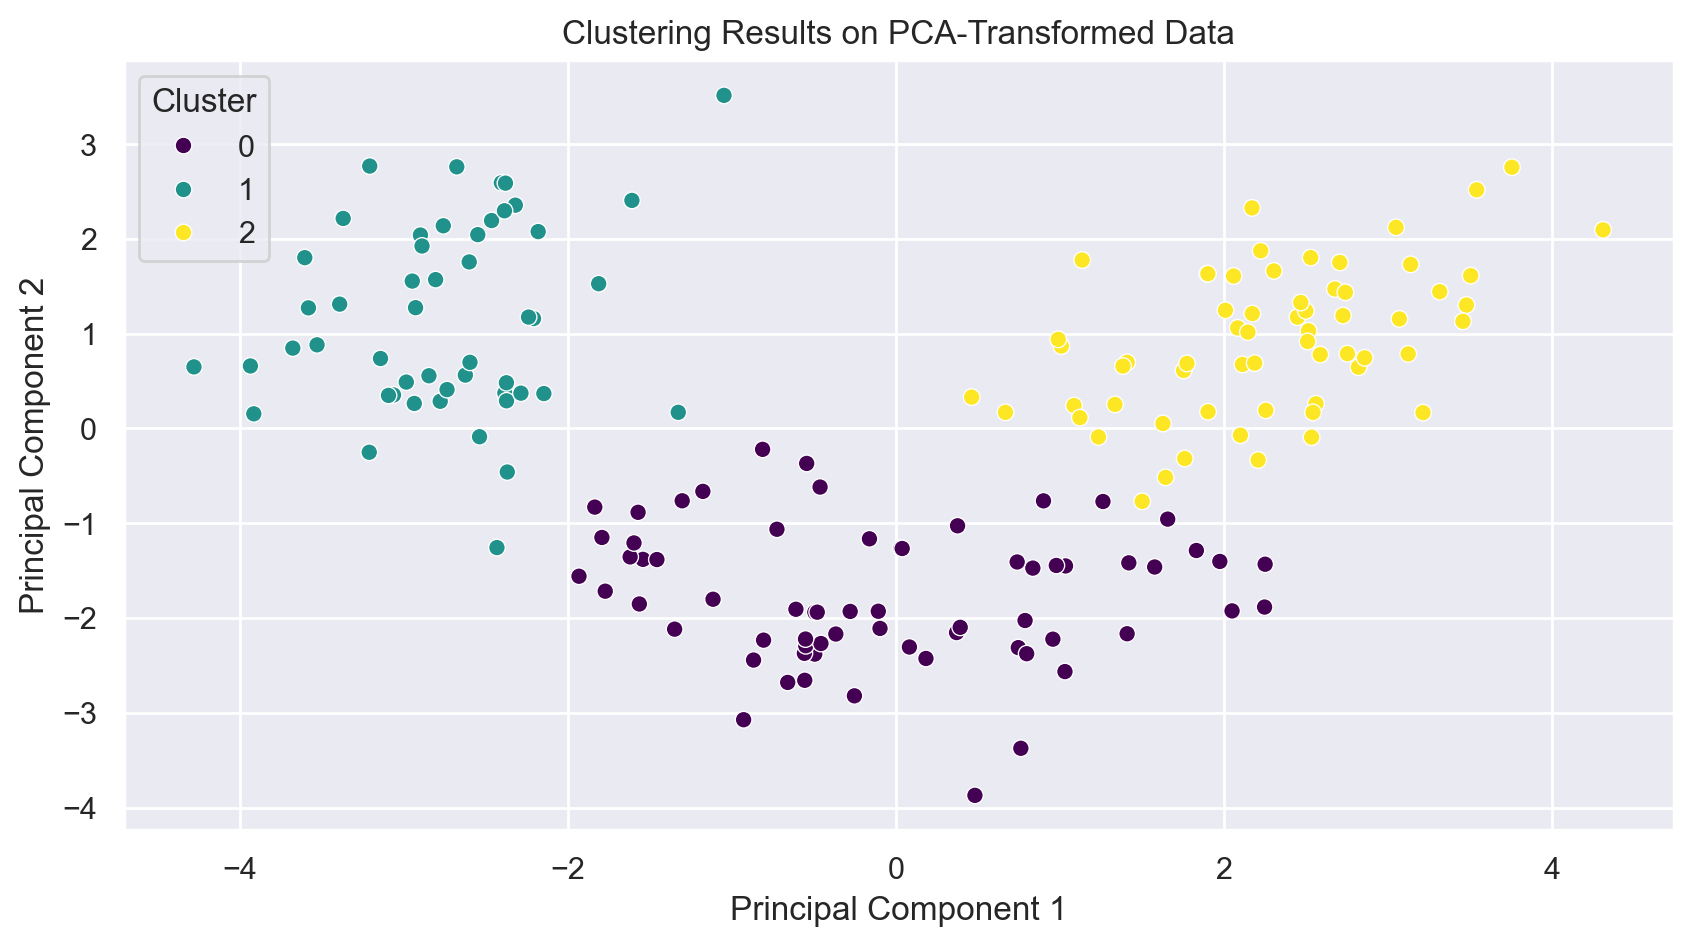

In [128]:
# Visualize clustering results in PCA space

sns.scatterplot(x=data['PC1'], y=data['PC2'], hue=clusters_pca, palette='viridis')
plt.title('Clustering Results on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

In [130]:
# Comparison and Analysis

comparison = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index'],
    'Original Data': [silhouette_original, davies_bouldin_original],
    'PCA-Transformed Data': [silhouette_pca, davies_bouldin_pca]
})

In [132]:
comparison

Metric  Original Data  PCA-Transformed Data
0      Silhouette Score       0.284859              0.360543
1  Davies-Bouldin Index       1.389188              1.122019

# Observations.

1. Silhouette Score : The PCA-transformed data has a significantly higher silhouette score, indicating better-defined and more cohesive clusters.
2. Davies-Bouldin Index : The index is lower for PCA-transformed data, suggesting improved clustering separation.

# Insights

1. The PCA Implementation reduced noise (outliers) and irrelevant information, leading to more distinct clusters.
2. PCA-transformed data achieved better clustering performance, as seen in the higher silhouette score and lower Davies-Bouldin index.
3. Logistic Regression Model gives better accuracy as compared to K-Means Clustering Model as it is known for Numerical & Categorical Data.
4. Scatter Plots give better visualization as compared to other graphs. It helps in finding clusters/groups of the column 'Type' by giving other related columns as Input.
5. Standardization helps the PCA Algorithm to make the Mean to 0 & Standard Deviation to 1 as PCA relies on the variance of features, and without standardization, features with larger scales dominate. Standardization helps the K-Means Clustering Algorithm to make the Mean to 0 & Standard Deviation to 1 as K-means clustering uses distance-based metrics, which are sensitive to feature scales.
6. Variance Function of PCA gives a percentage of each column for how much information it contains for prediction of Type of Wine. Cumsum function of Numpy Library gives a addition of variance taking into consideration each column by giving a total 100.
7.  Scree Plot tells us how many Principal Components (PC's) from entire dataset contain more information & tells us how many components should be created by the PCA Class. Scree plot guides optimal component selection for dimensionality reduction.
8.  3D graphs allow for better visualization of data with three dimensions, providing a more comprehensive view than 2D plots.